# 와인 데이터에 대한 2진 분류

#### 와인 데이터 불러오기 
* 12개의 속성으로 구성 

In [1]:
import pandas as pd

# 인터넷에서 데이터 불러오기 
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

#### 와인 데이터세트 합치기 

In [4]:
red['type'] = 0  # 컬럼 추가 후 데이터 0으로 설정 
white['type'] = 1
print(red.head(2))
print(white.head(2))

# 두 데이터프레임을 합친 새로운 데이터프레임 생성 
wine = pd.concat([red, white])

# 통계 정보 확인 
print(wine.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   

#### 레드 와인과 화이트 와인 type 히스토그램
* plt.hist() 로 작성 
* value_counts() : 속성에 존재하는 각 항목의 갯수 
* 1:3 정도의 비율인데 가능하면 비슷한 비율로 맞춰주는 것이 좋고, 1:3 정도까지는 그냥 사용해도 상관 없다. 

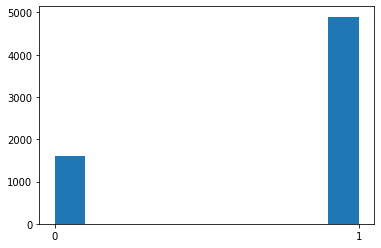

1    4898
0    1599
Name: type, dtype: int64


In [8]:
import matplotlib.pyplot as plt

plt.hist(wine['type'])
plt.xticks([0, 1])
plt.show()

print(wine['type'].value_counts())  # 각 항목에 속하는 갯수 출력 

#### 데이터 요약 정보 확인
* pandas의 info() 이용 - 데이터프레임을 구성하는 속성들의 정보를 보여줌
* 정규화 가정에서 숫자가 아닌 값이 들어가면 오류 발생 
* 6497 non-null   float64 : 속성이 6497개의 행에 null 없이 float64 데이터 유형으로 존재한다는 의미

In [9]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


#### 데이터 정규화

In [16]:
wine_norm = (wine - wine.min()) / (wine.max() - wine.min()) # 정규화 
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
4             0.034722              0.064516  0.206092  0.612403   0.191011   

    alcohol   quality  type  
0  0.202899  0.333333   0.

#### 데이터 섞은 후 numpy array로 변환
* sample() 함수 : 전체 데이터프레임에서 frac 인수로 지정된 비율만큼 행을 랜덤하게 뽑아서 새로운 데이터프레임 생성 

In [21]:
import numpy as np

wine_suffle = wine_norm.sample(frac=1)
print(wine_suffle.head())

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1641       0.214876          0.093333     0.295181        0.105828   0.074751   
556        0.380165          0.180000     0.427711        0.177914   0.061462   
801        0.396694          0.313333     0.054217        0.041411   0.098007   
3937       0.223140          0.186667     0.216867        0.093558   0.292359   
4640       0.181818          0.106667     0.246988        0.010736   0.044850   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
1641             0.142361              0.334101  0.148255  0.426357   
556              0.072917              0.354839  0.213804  0.201550   
801              0.024306              0.025346  0.197417  0.395349   
3937             0.175347              0.334101  0.157509  0.348837   
4640             0.142361              0.258065  0.059186  0.248062   

      sulphates   alcohol   quality  type  
1641   0.168539  0.304348  0.500000   1.0 

* 데이터프레임을 넘파이로 변경 

In [27]:
wine_np = wine_suffle.to_numpy()
print(wine_np[:5])

[[0.21487603 0.09333333 0.29518072 0.10582822 0.07475083 0.14236111
  0.33410138 0.14825525 0.42635659 0.16853933 0.30434783 0.5
  1.        ]
 [0.38016529 0.18       0.42771084 0.17791411 0.06146179 0.07291667
  0.35483871 0.21380374 0.20155039 0.24157303 0.20289855 0.33333333
  1.        ]
 [0.39669421 0.31333333 0.05421687 0.04141104 0.09800664 0.02430556
  0.02534562 0.19741662 0.39534884 0.12359551 0.28985507 0.33333333
  0.        ]
 [0.2231405  0.18666667 0.21686747 0.09355828 0.2923588  0.17534722
  0.33410138 0.15750916 0.34883721 0.11235955 0.1884058  0.33333333
  1.        ]
 [0.18181818 0.10666667 0.24698795 0.0107362  0.0448505  0.14236111
  0.25806452 0.05918643 0.24806202 0.23595506 0.54347826 0.5
  1.        ]]


#### train 데이터와 test 데이터로 분리
* 전체의 80% : 20% 로 분리 

In [35]:
import tensorflow as tf

train_idx = int(len(wine_np) * 0.8)
train_idx

5197

* 훈련 데이터와 학습 데이터로 분리 
* to_categorical() : 결과 데이터는 원-핫-인코딩으로 표현

In [40]:
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
print(train_X[1], '\n')
print(train_Y[1], '\n')
print(test_X[1], '\n')
print(test_Y[1], '\n')

train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
print(train_Y[1])
print(test_Y[1])

[0.38016529 0.18       0.42771084 0.17791411 0.06146179 0.07291667
 0.35483871 0.21380374 0.20155039 0.24157303 0.20289855 0.33333333] 

1.0 

[0.23966942 0.25333333 0.14457831 0.01687117 0.11295681 0.05902778
 0.06451613 0.14825525 0.51937984 0.21348315 0.37681159 0.5       ] 

0.0 

[0. 1.]
[1. 0.]


#### 와인 데이터셋 분류 모델 생성
* 12개의 항목에 대해 처리하는 모델 
* 마지막 units=2 는 출력 결과가 2종류 0 / 1
* softmax : 활성화 함수로 확률로 선택 
* softmax는 분류 문제나 언어 RNN에서 다음 토큰을 예측, 강화학습에서 에이전트의 행동 확률을 구하는 등 결과값으로 확률이 필요한 다양한 분야에 사용됨

In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12, )),
     tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


#### 모델 컴파일 
* 손실함수로 categorial_crossentropy를 사용 
* Categorical Cross Entropy(CCE) : 모든 범주에 대해 평균을 계산함
* 정확도(accuracy) : 분류 문제는 정확도로 퍼포먼스를 측정하기 때문에 정확도를 설정하는 것이 필수 
* 학습시에 loss와 accuracy가 함께 저장됨 

In [44]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

#### 분류 모델 학습 
* validation_split : 훈련 데이터의 25% 정도를 검증 데이터로 사용
* 분류 모델에서는 loss: 0.0415 - accuracy: 0.9895 - val_loss: 0.0613 - val_accuracy: 0.9746 와 같이 학습 데이터의 accuracy와 검증 데이터의 val_accuracy가 같이 표시된다.

In [48]:
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Train on 3897 samples, validate on 1300 samples
Epoch 1/25
3897/3897 [==============================] - 1s 189us/sample - loss: 0.1419 - accuracy: 0.9474 - val_loss: 0.0809 - val_accuracy: 0.9815
Epoch 2/25
3897/3897 [==============================] - 0s 63us/sample - loss: 0.0615 - accuracy: 0.9831 - val_loss: 0.0706 - val_accuracy: 0.9800
Epoch 3/25
3897/3897 [==============================] - 0s 64us/sample - loss: 0.0804 - accuracy: 0.9782 - val_loss: 0.0322 - val_accuracy: 0.9885
Epoch 4/25
3897/3897 [==============================] - 0s 63us/sample - loss: 0.0595 - accuracy: 0.9861 - val_loss: 0.0313 - val_accuracy: 0.9892
Epoch 5/25
3897/3897 [==============================] - 0s 62us/sample - loss: 0.0517 - accuracy: 0.9887 - val_loss: 0.0457 - val_accuracy: 0.9862
Epoch 6/25
3897/3897 [==============================] - 0s 65us/sample - loss: 0.0482 - accuracy: 0.9882 - val_loss: 0.0441 - val_accuracy: 0.9885
Epoch 7/25
3897/3897 [==============================] - 0s 64us/sampl

#### 분류 모델 학습 결과 시각화

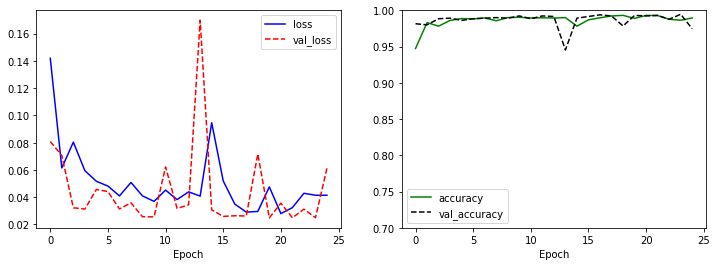

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

#### 분류 모델 평가

In [54]:
model.evaluate(test_X, test_Y)

1300/1300 [==============================] - 0s 55us/sample - loss: 0.0742 - accuracy: 0.9754


[0.07419595336684814, 0.9753846]